In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Reload the model h5 format

In [4]:
from tensorflow.keras.models import load_model

In [5]:
model_path='Saved Model/CNN_VIS_0.9833333492279053_model_1619112578.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [6]:
model=reload_model

In [7]:
model.layers

## Image Class
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

## Testing a random image

In [8]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[5.1155919e-08 9.9748516e-01 6.6239392e-10 6.4331900e-08 2.5147169e-03
  2.3137806e-10]]
1


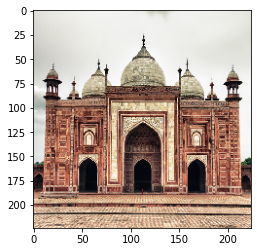

In [9]:
random_image=image.load_img('Images/mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [11]:
"""
input_image=cv2.imread('Images/building_house5.png')
rgb_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
"""


"\ninput_image=cv2.imread('Images/building_house5.png')\nrgb_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)\nplt.imshow(rgb_image)\n"

In [12]:
"""
test_image=rgb_image.reshape((1,)+rgb_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
"""


"\ntest_image=rgb_image.reshape((1,)+rgb_image.shape)\ntest_image=test_image/255.0\nprint(test_image.shape)\npredicted_class=model.predict(test_image)\nprint(predicted_class)\n#print('True classification')\nprint(np.argmax(predicted_class))\n"

## Convolution Filter Visualization: 
- Convolution 3x3

In [8]:
layer=model.layers
layer

## Convolution: 0

In [9]:
filters,biases=model.layers[0].get_weights()
print(layer[0].name,filters.shape)

conv2d (3, 3, 3, 32)


## Numerical Values of Filters

In [16]:
filters[:,:,:,0]

array([[[ 0.00216223, -0.12459189, -0.10175795],
        [ 0.00934245,  0.02112308,  0.11812723],
        [-0.10661351,  0.11080297,  0.02139206]],

       [[-0.11236895,  0.07614908, -0.12249797],
        [ 0.10568455,  0.08818206,  0.09650642],
        [ 0.07870153, -0.08206056, -0.11502008]],

       [[-0.11856175, -0.02798354, -0.00620362],
        [-0.01138094,  0.10308103, -0.10326934],
        [ 0.07912979,  0.04275456,  0.10122793]]], dtype=float32)

In [48]:
filters[:,:,:,1]

array([[[-0.08937831,  0.02189078,  0.00915092],
        [ 0.03254507,  0.13307509,  0.11670788],
        [-0.06133597, -0.09259015, -0.1105869 ]],

       [[ 0.01818278,  0.1425009 , -0.05031147],
        [-0.08652505,  0.13480535, -0.1183577 ],
        [-0.06910532,  0.1312387 , -0.01032173]],

       [[ 0.04531452,  0.06587377,  0.01525397],
        [-0.12460088, -0.02889853, -0.06868747],
        [ 0.10430609,  0.00346021, -0.08673795]]], dtype=float32)

In [47]:
for f in range(5):
    #print('3D Filter: '+str(f)+'\n\n',filters[:,:,:,f])
    print("Convolution Filter: ",f,'\n')
    RGB=filters[:,:,:,f]
    for i,channel in enumerate(RGB):
        print('Filters : ',f,' RGB Channel: ',i)
        print(channel)
        print('\n')
    print('-----------------------------------------------------')
        


Convolution Filter:  0 

Filters :  0  RGB Channel:  0
[[ 0.00216223 -0.12459189 -0.10175795]
 [ 0.00934245  0.02112308  0.11812723]
 [-0.10661351  0.11080297  0.02139206]]


Filters :  0  RGB Channel:  1
[[-0.11236895  0.07614908 -0.12249797]
 [ 0.10568455  0.08818206  0.09650642]
 [ 0.07870153 -0.08206056 -0.11502008]]


Filters :  0  RGB Channel:  2
[[-0.11856175 -0.02798354 -0.00620362]
 [-0.01138094  0.10308103 -0.10326934]
 [ 0.07912979  0.04275456  0.10122793]]


-----------------------------------------------------
Convolution Filter:  1 

Filters :  1  RGB Channel:  0
[[-0.08937831  0.02189078  0.00915092]
 [ 0.03254507  0.13307509  0.11670788]
 [-0.06133597 -0.09259015 -0.1105869 ]]


Filters :  1  RGB Channel:  1
[[ 0.01818278  0.1425009  -0.05031147]
 [-0.08652505  0.13480535 -0.1183577 ]
 [-0.06910532  0.1312387  -0.01032173]]


Filters :  1  RGB Channel:  2
[[ 0.04531452  0.06587377  0.01525397]
 [-0.12460088 -0.02889853 -0.06868747]
 [ 0.10430609  0.00346021 -0.08673795]

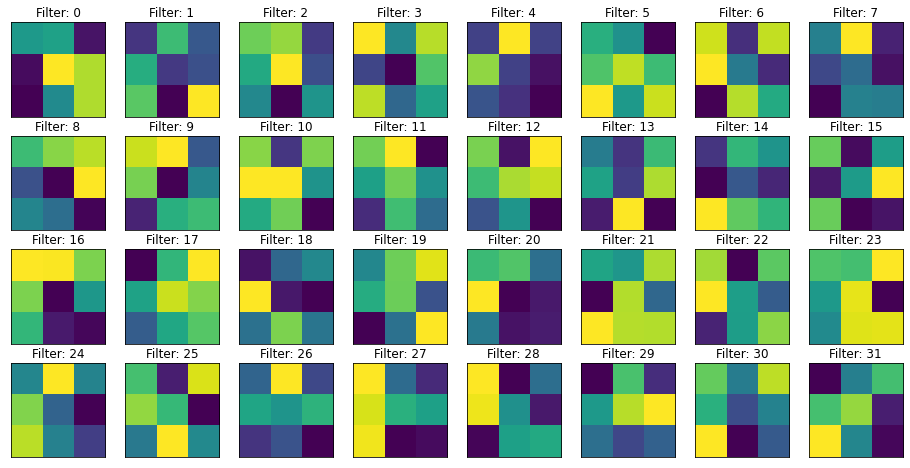

In [15]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0])
plt.show()  

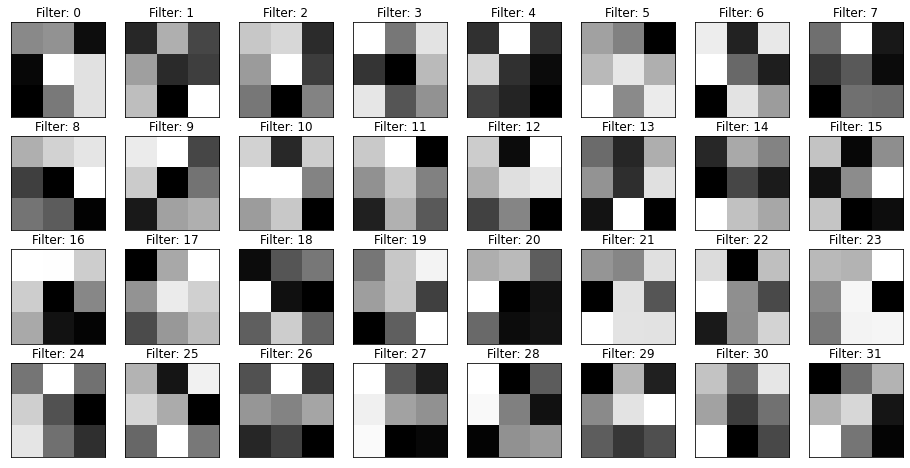

In [16]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
plt.show()  

## Convolution: 1

In [54]:
filters_1,biases_1=model.layers[2].get_weights()
print(layer[2].name,filters_1.shape)

conv2d_1 (3, 3, 32, 64)


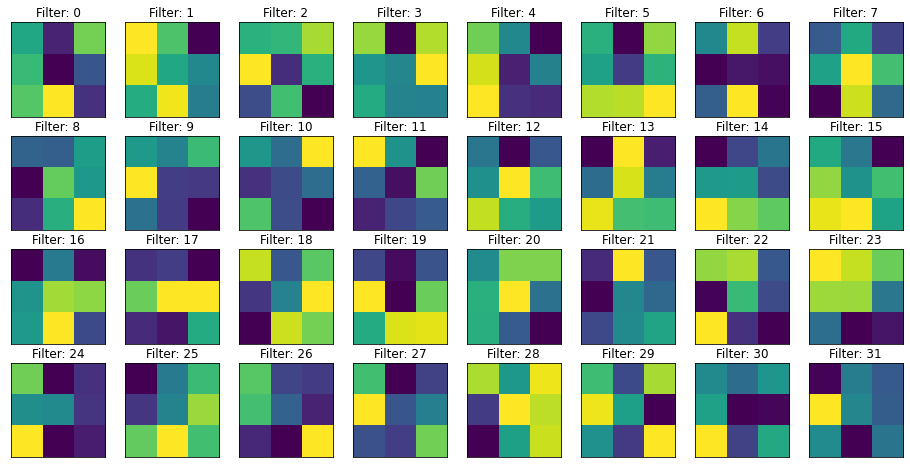

In [60]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_4[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0])
plt.show()  

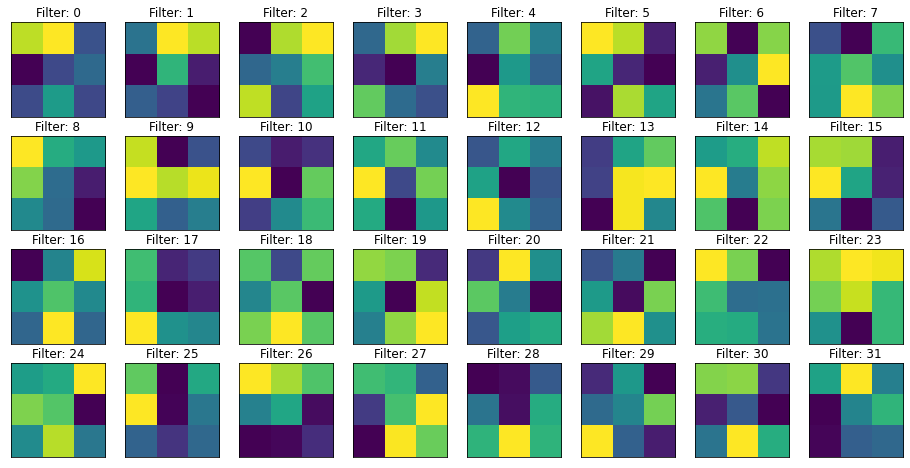

In [18]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_1[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0])
plt.show()  

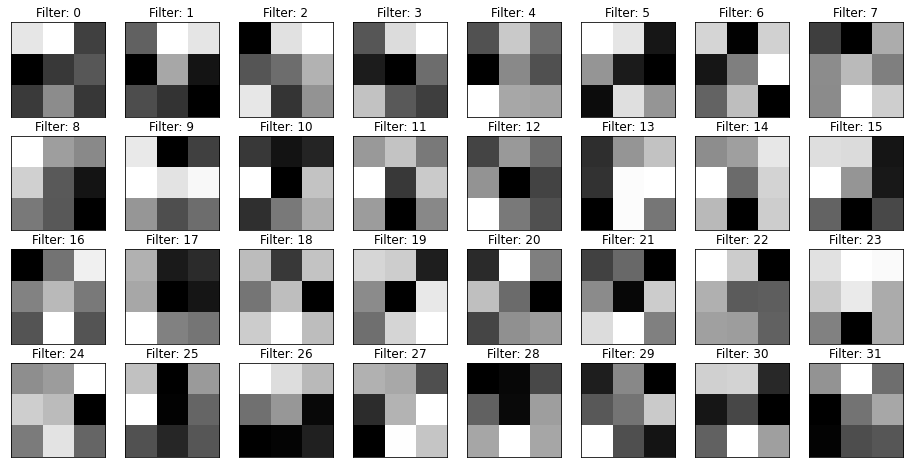

In [19]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_1[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
plt.show()  

## Layers Visualization

In [10]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'dropout', 'flatten', 'dense', 'dropout_1', 'dense_1']


In [11]:
model_layers

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'dropout',
 'flatten',
 'dense',
 'dropout_1',
 'dense_1']

In [1]:
from tensorflow.keras.models import Model

## Convolutional Layers Implementation

In [12]:
conv2d_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

In [13]:
conv2d_features=conv2d_ouput.predict(test_image)
conv2d_1_features=conv2d_1_ouput.predict(test_image)
conv2d_2_features=conv2d_2_ouput.predict(test_image)
conv2d_3_features=conv2d_3_ouput.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)

Conv layer feature output shape:  (1, 224, 224, 32)
Conv_1 layer feature output shape:  (1, 112, 112, 64)
Conv_2 layer feature output shape:  (1, 56, 56, 128)
Conv_3 layer feature output shape:  (1, 28, 28, 256)


## Maxpooling Layers Implementation

In [14]:
max_pooling_2d_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
max_pooling_2d_1_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
max_pooling_2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
max_pooling_2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)

In [15]:
maxpool2d_features=max_pooling_2d_output.predict(test_image)
maxpool2d_1_features=max_pooling_2d_1_output.predict(test_image)
maxpool2d_2_features=max_pooling_2d_2_output.predict(test_image)
maxpool2d_3_features=max_pooling_2d_3_output.predict(test_image)
print('Conv layer feature output shape: ',maxpool2d_features.shape)
print('Conv_1 layer feature output shape: ',maxpool2d_1_features.shape)
print('Conv_2 layer feature output shape: ',maxpool2d_2_features.shape)
print('Conv_3 layer feature output shape: ',maxpool2d_3_features.shape)

Conv layer feature output shape:  (1, 112, 112, 32)
Conv_1 layer feature output shape:  (1, 56, 56, 64)
Conv_2 layer feature output shape:  (1, 28, 28, 128)
Conv_3 layer feature output shape:  (1, 14, 14, 256)


## Dense Layer Implementation

In [16]:
dense_output=Model(inputs=model.input,outputs=model.get_layer('dense').output)
dense_1_output=Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

In [17]:
dense_features=dense_output.predict(test_image)
dense_1_features=dense_1_output.predict(test_image)
print('Dense layer feature output shape: ',dense_features.shape)
print('Dense_1 layer feature output shape: ',dense_1_features.shape)

Dense layer feature output shape:  (1, 512)
Dense_1 layer feature output shape:  (1, 6)


## Layers Visualization
- conv2d
- max_pooling2d
- conv2d_1
- max_pooling2d_1
- conv2d_2
- max_pooling2d_2
- conv2d_3
- max_pooling2d_3
- dropout

## Convolution: 0

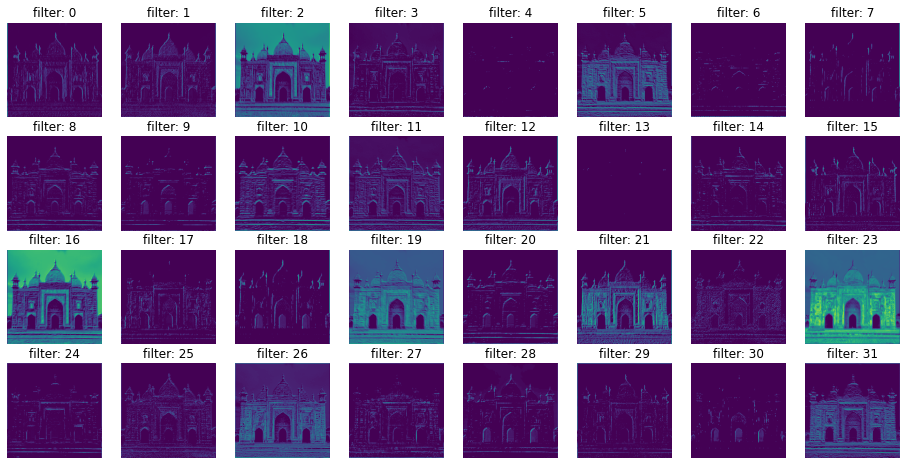

In [18]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i])
plt.show()

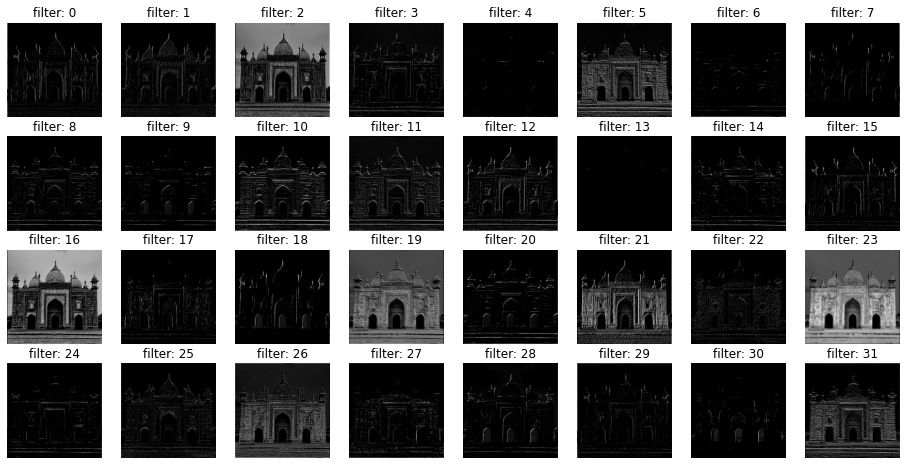

In [30]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i],cmap='gray')
plt.show()

In [31]:
"""
cv2.imshow('Filter',conv2d_features[0, :, :, 10])
cv2.waitKey()
cv2.destroyAllWindows()
"""


"\ncv2.imshow('Filter',conv2d_features[0, :, :, 10])\ncv2.waitKey()\ncv2.destroyAllWindows()\n"

## Maxpooling2D: 0

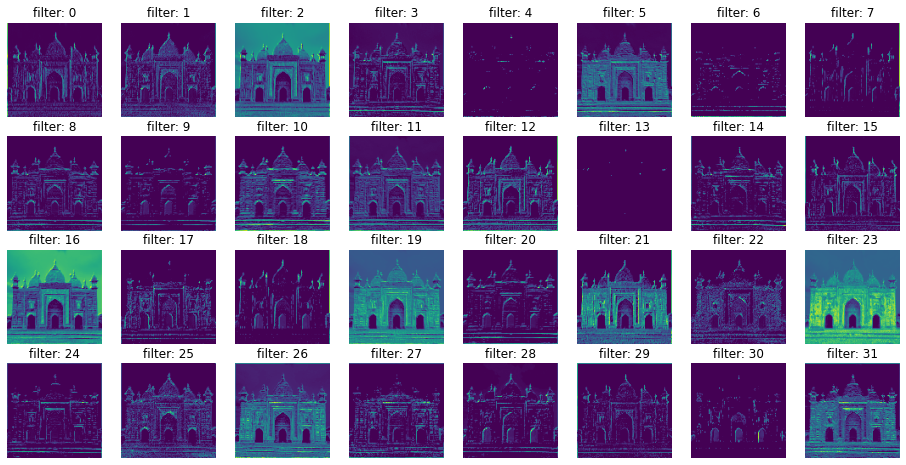

In [32]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i])
plt.show()

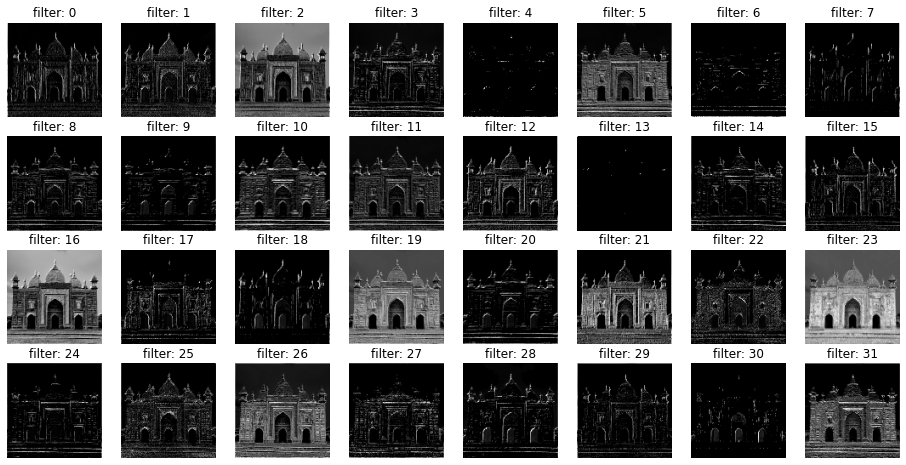

In [33]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 1

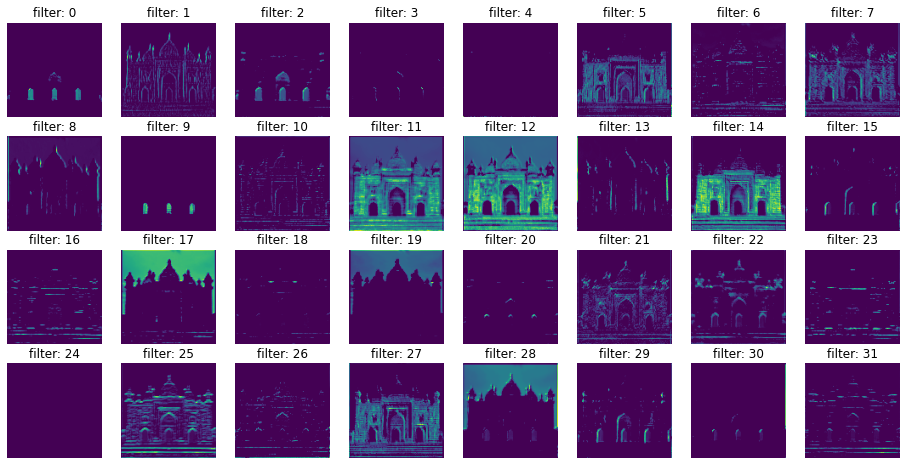

In [34]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i])
plt.show()

## Maxpooling2D: 1

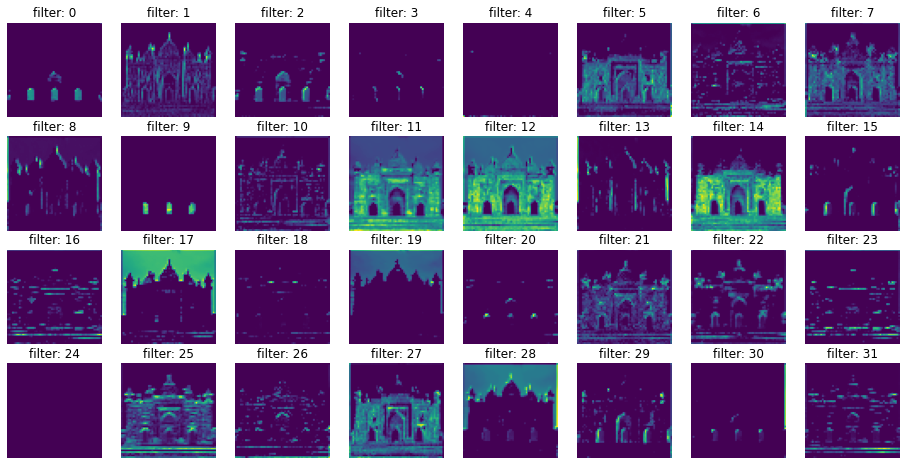

In [35]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i])
plt.show()

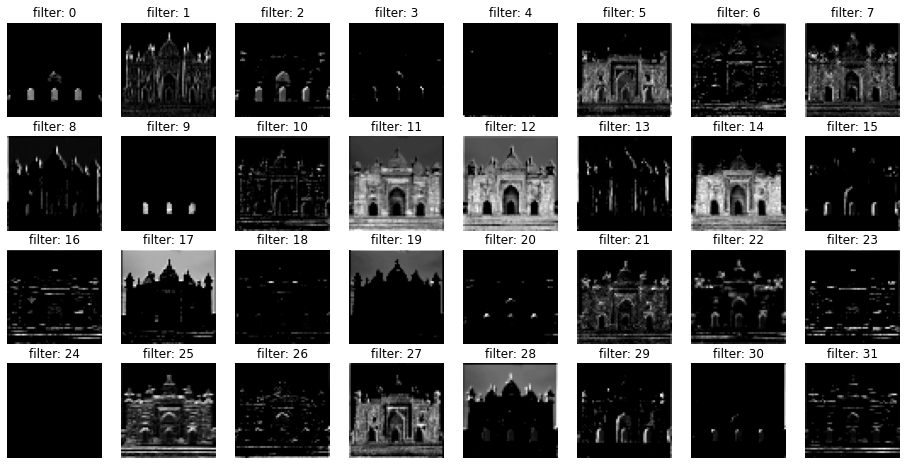

In [36]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 2

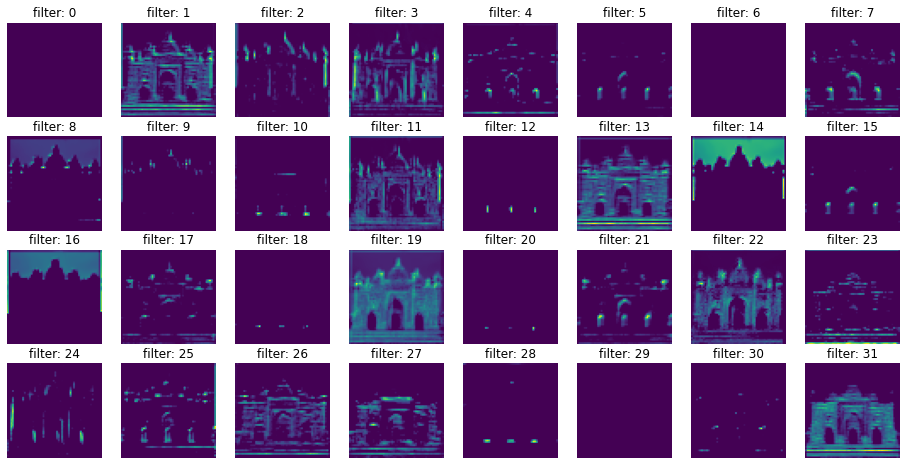

In [37]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i])
plt.show()

## Maxpooling2D : 2

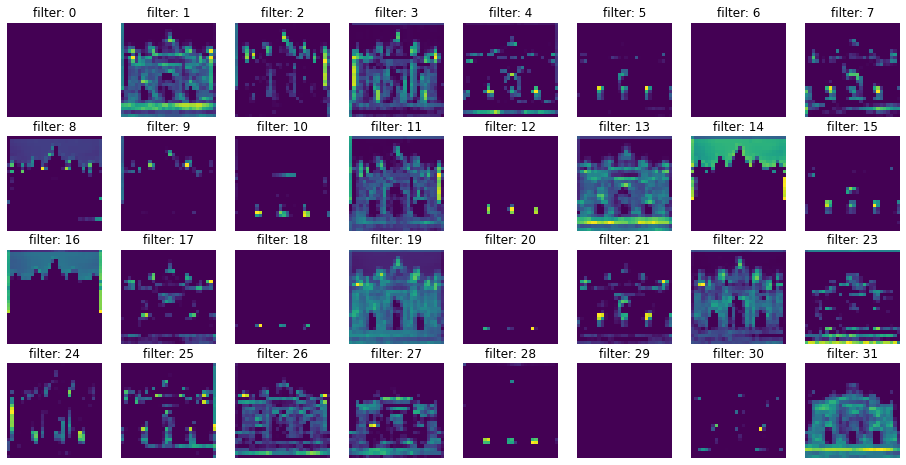

In [20]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i])
plt.show()

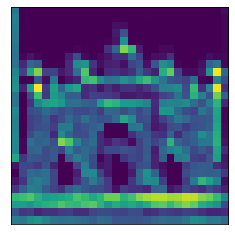

In [23]:
plt.xticks([])
plt.yticks([])
plt.imshow(maxpool2d_2_features[0, :, :, 1])

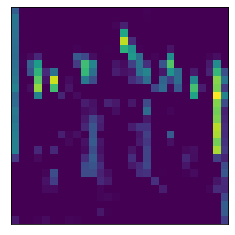

In [30]:
plt.xticks([])
plt.yticks([])
plt.imshow(maxpool2d_2_features[0, :, :, 2])

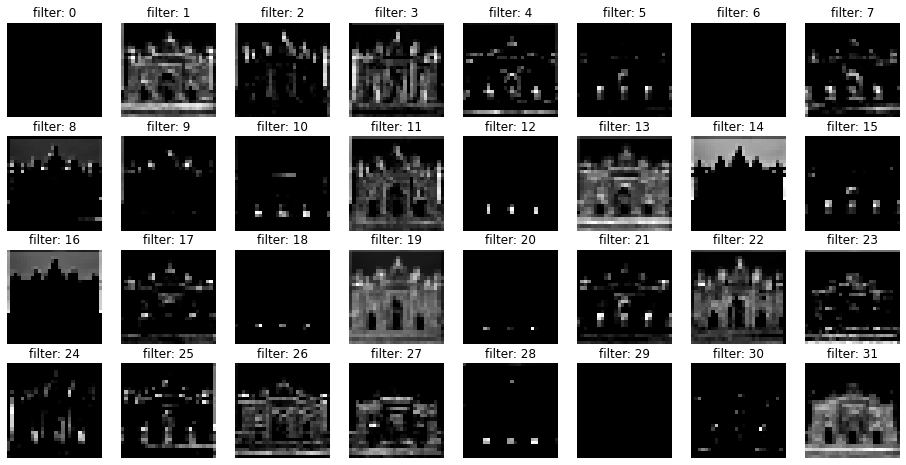

In [39]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 3

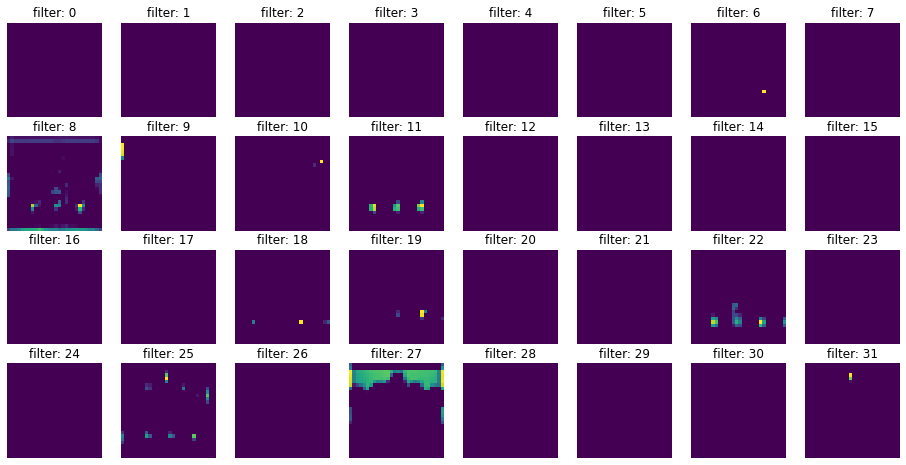

In [40]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i])
plt.show()

## Maxpooling 2D: 3

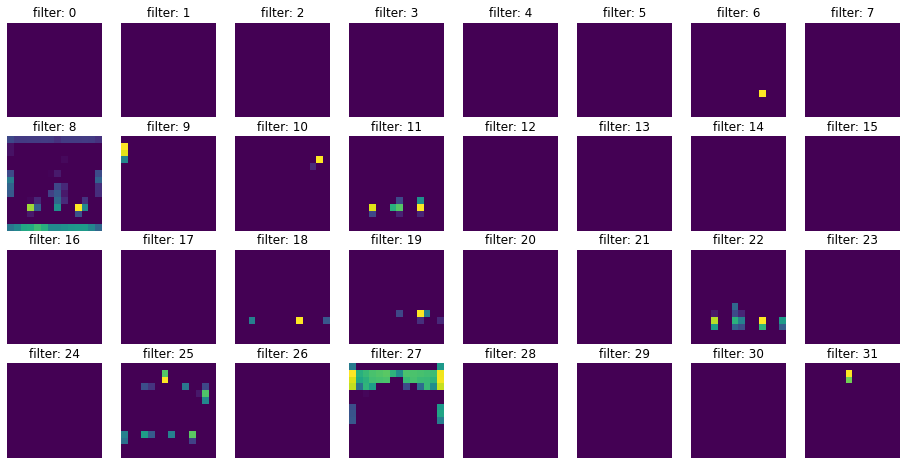

In [19]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_3_features[0, :, :, i])
plt.show()

## Features Dense: 0

In [42]:
dense_features.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.9856692 , 1.3301346 , 0.        , 0.        , 0.        ,
       3.2464273 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 3.076975  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31668347, 0.        , 0.        , 0.        , 2.5895948 ,
       0.07165039, 0.        , 0.        , 0.        , 1.9705597 ,
       0.        , 0.        , 0.        , 0.5114869 , 0.        ,
       0.        , 0.        , 4.129737  , 0.        , 0.17528954,
       0.        , 3.646178  , 0.86059856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.088851  , 0.        , 0.        , 0.        , 0.        ,
       1.2478584 , 2.726715  , 0.        , 0.        , 0.     

## Features Dense: 1

In [43]:
dense_1_features.flatten()

array([5.1155919e-08, 9.9748516e-01, 6.6239392e-10, 6.4331900e-08,
       2.5147169e-03, 2.3137806e-10], dtype=float32)

## Dropout Implementation

In [44]:
dropout_output=Model(inputs=model.input,outputs=model.get_layer('dropout').output)
dropout_1_output=Model(inputs=model.input,outputs=model.get_layer('dropout_1').output)

In [45]:
dropout_features=dropout_output.predict(test_image)
dropout_1_features=dropout_1_output.predict(test_image)
print('Dropout layer feature output shape: ',dropout_features.shape)
print('Dropout_1 layer feature output shape: ',dropout_1_features.shape)

Dropout layer feature output shape:  (1, 14, 14, 256)
Dropout_1 layer feature output shape:  (1, 512)


## Dropout: 0

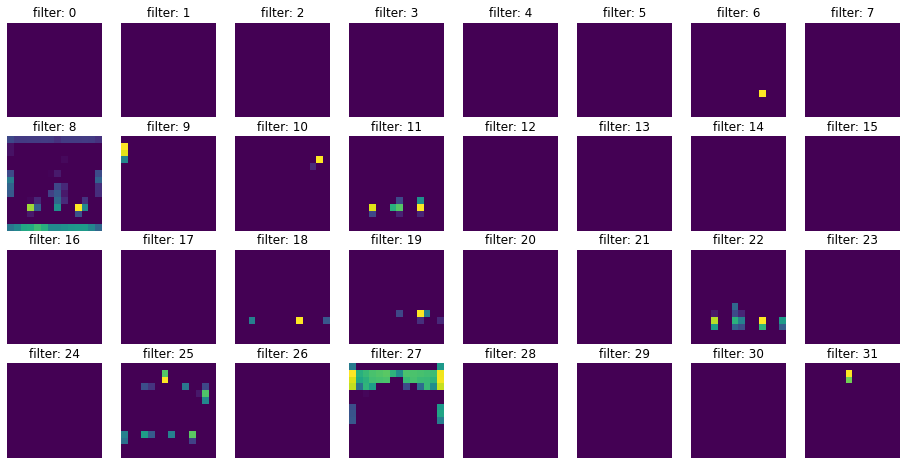

In [46]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(dropout_features[0, :, :, i])
plt.show()

## Dropout: 1

In [47]:
dropout_1_features.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.9856692 , 1.3301346 , 0.        , 0.        , 0.        ,
       3.2464273 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 3.076975  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31668347, 0.        , 0.        , 0.        , 2.5895948 ,
       0.07165039, 0.        , 0.        , 0.        , 1.9705597 ,
       0.        , 0.        , 0.        , 0.5114869 , 0.        ,
       0.        , 0.        , 4.129737  , 0.        , 0.17528954,
       0.        , 3.646178  , 0.86059856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.088851  , 0.        , 0.        , 0.        , 0.        ,
       1.2478584 , 2.726715  , 0.        , 0.        , 0.     